In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

importing the necessary packages

In [2]:
import pandas as pd
from gspread_pandas import Spread, Client
import plotly.express as px
from fbprophet import Prophet
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime as dt

In [3]:
## initializing the Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the dataset from Yahoo Finance


In [4]:
start = dt.datetime(2021,4,1)
end = dt.datetime.now()

df = pdr.DataReader('TCS.NS','yahoo',start,end)
df = df.reset_index()
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-04-01,3215.000000,3145.000000,3191.100098,3165.000000,4285076.0,3131.214355
1,2021-04-05,3263.000000,3151.000000,3171.000000,3238.899902,5317862.0,3204.325439
2,2021-04-06,3275.000000,3230.000000,3275.000000,3264.699951,2291562.0,3229.849854
3,2021-04-07,3277.550049,3234.800049,3259.000000,3271.399902,2491268.0,3236.478516
4,2021-04-08,3335.000000,3266.050049,3270.000000,3317.350098,2578118.0,3281.937988
...,...,...,...,...,...,...,...
245,2022-03-29,3722.000000,3691.000000,3694.750000,3705.350098,2689063.0,3705.350098
246,2022-03-30,3738.000000,3706.199951,3738.000000,3731.550049,1583455.0,3731.550049
247,2022-03-31,3754.649902,3720.199951,3740.000000,3739.949951,2168110.0,3739.949951
248,2022-04-01,3763.000000,3728.050049,3748.000000,3758.750000,1387014.0,3758.750000


In [5]:
## dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       250 non-null    datetime64[ns]
 1   High       250 non-null    float64       
 2   Low        250 non-null    float64       
 3   Open       250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Volume     250 non-null    float64       
 6   Adj Close  250 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.8 KB


In [6]:
## data description
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.000000
mean,3540.727201,3476.535205,3510.137603,3507.904391,2.589663e+06,3495.604324
std,265.539377,257.546254,262.279390,262.469602,1.369218e+06,269.736335
min,3055.000000,3004.000000,3024.899902,3035.649902,3.289910e+05,3003.244873
25%,3291.174988,3232.624939,3265.125000,3263.237488,1.744753e+06,3242.591858
50%,3573.474976,3506.199951,3549.300049,3549.599976,2.160583e+06,3545.274902
75%,3759.549988,3706.037476,3739.500000,3733.200012,3.040583e+06,3730.462708
max,4043.000000,3980.000000,4033.949951,4019.149902,1.184540e+07,4012.099854


## Data Visualization using Plotly Express

In [7]:
## Area Plot by Close
px.area(df, x="Date", y="Close")

In [8]:
## Line Plot by Close
px.line(df, x="Date", y="Close")

In [9]:
## Area Plot by Volume
px.area(df, x="Date", y="Volume")

In [10]:
## Bar plot by Volume
px.bar(df, x="Date", y="Volume")

In [11]:
## Box plot by Close
px.box(df, y="Close")

## Understanding Facebook Prophet

### Data Preparation

In [12]:
## Creating separate dataset for Date and Close
columns = ['Date','Close']
ndf = pd.DataFrame(df, columns=columns)
ndf

,Date,Close
0,2021-04-01,3165.000000
1,2021-04-05,3238.899902
2,2021-04-06,3264.699951
3,2021-04-07,3271.399902
4,2021-04-08,3317.350098
...,...,...
245,2022-03-29,3705.350098
246,2022-03-30,3731.550049
247,2022-03-31,3739.949951
248,2022-04-01,3758.750000


In [13]:
## Renaming the columns
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})
prophet_df

,ds,y
0,2021-04-01,3165.000000
1,2021-04-05,3238.899902
2,2021-04-06,3264.699951
3,2021-04-07,3271.399902
4,2021-04-08,3317.350098
...,...,...
245,2022-03-29,3705.350098
246,2022-03-30,3731.550049
247,2022-03-31,3739.949951
248,2022-04-01,3758.750000


### Creating Facebook Prophet Model

In [14]:
## Building Facebook Prophet model

model = Prophet()

model.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Forecasting

In [15]:
## Forecasting the next 30 days

future = model.make_future_dataframe(periods=30)
forecast= model.predict(future)

forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-04-01,3179.308576,3075.313895,3288.676126,3179.308576,3179.308576,4.470089,4.470089,4.470089,4.470089,4.470089,4.470089,0.0,0.0,0.0,3183.778665
1,2021-04-05,3173.985816,3067.229042,3277.003520,3173.985816,3173.985816,-2.309981,-2.309981,-2.309981,-2.309981,-2.309981,-2.309981,0.0,0.0,0.0,3171.675835
2,2021-04-06,3172.655126,3073.947703,3284.712975,3172.655126,3172.655126,8.491980,8.491980,8.491980,8.491980,8.491980,8.491980,0.0,0.0,0.0,3181.147107
3,2021-04-07,3171.324436,3077.233026,3279.794279,3171.324436,3171.324436,8.373248,8.373248,8.373248,8.373248,8.373248,8.373248,0.0,0.0,0.0,3179.697684
4,2021-04-08,3169.993746,3067.366794,3288.176516,3169.993746,3169.993746,4.470089,4.470089,4.470089,4.470089,4.470089,4.470089,0.0,0.0,0.0,3174.463835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2022-04-27,3559.336270,3447.727212,3697.203164,3499.989997,3623.370907,8.373248,8.373248,8.373248,8.373248,8.373248,8.373248,0.0,0.0,0.0,3567.709518
275,2022-04-28,3556.959137,3435.207225,3689.393844,3493.119685,3622.627803,4.470089,4.470089,4.470089,4.470089,4.470089,4.470089,0.0,0.0,0.0,3561.429226
276,2022-04-29,3554.582005,3432.226673,3693.875444,3486.719482,3625.872556,9.185153,9.185153,9.185153,9.185153,9.185153,9.185153,0.0,0.0,0.0,3563.767158
277,2022-04-30,3552.204872,3415.503362,3667.815252,3480.649248,3626.614566,-14.105245,-14.105245,-14.105245,-14.105245,-14.105245,-14.105245,0.0,0.0,0.0,3538.099627


In [16]:
forecast_new = forecast[['ds','yhat']]
forecast_new

,ds,yhat
0,2021-04-01,3183.778665
1,2021-04-05,3171.675835
2,2021-04-06,3181.147107
3,2021-04-07,3179.697684
4,2021-04-08,3174.463835
...,...,...
274,2022-04-27,3567.709518
275,2022-04-28,3561.429226
276,2022-04-29,3563.767158
277,2022-04-30,3538.099627


In [17]:
## Line Plot by yhat
px.line(forecast, x='ds',y='yhat')

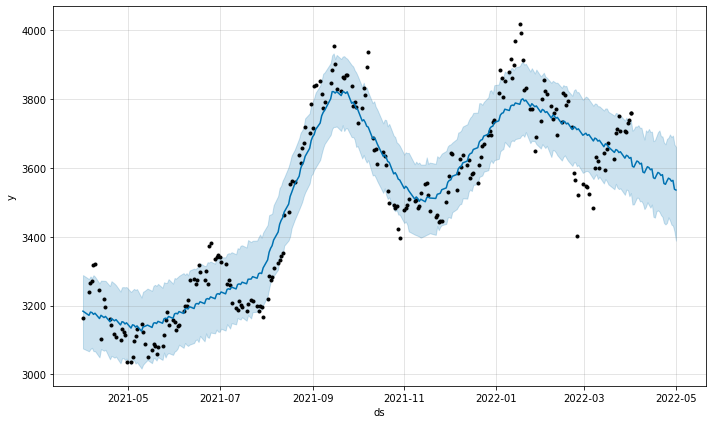

In [18]:
## Prophet plot

figure1 = model.plot(forecast, xlabel='ds',ylabel='y')

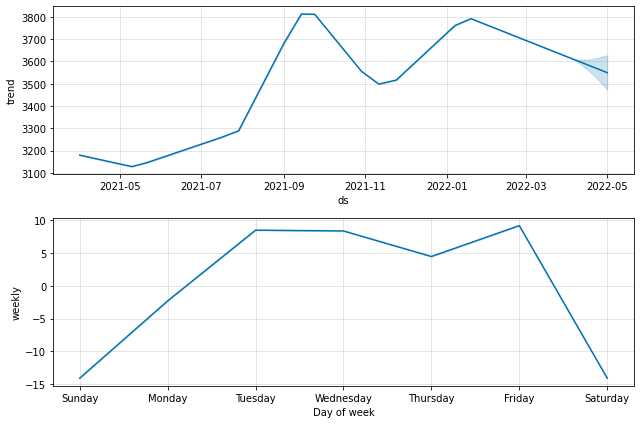

In [19]:
## Prophet plot components

figure2 = model.plot_components(forecast)

### Moving the Forecast data to Google Spreadsheets

In [20]:
!pip install gspread-dataframe==3.2.2

In [21]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)
from gspread_dataframe import *
# create, and save df
title = 'New Sheet'
gc.create(title)  # if not exist
from gspread_dataframe import *
sheet = gc.open(title).sheet1
set_with_dataframe(sheet, forecast_new,row=1,col=3) 

## To get minutes wise data using Yahoo Finance

In [26]:
!pip install yfinance

In [23]:
import yfinance as yf

In [27]:
data = yf.download("AAPL", start="2022-03-25", end="2022-04-1",interval='1m')
data = data.reset_index()
data

[*********************100%***********************]  1 of 1 completed


,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-03-25 09:30:00-04:00,173.880005,173.949997,173.520004,173.679993,173.679993,2498677
1,2022-03-25 09:31:00-04:00,173.660004,173.929993,173.470001,173.923004,173.923004,418850
2,2022-03-25 09:32:00-04:00,173.929993,174.110001,173.899994,173.979996,173.979996,505151
3,2022-03-25 09:33:00-04:00,173.949997,174.039993,173.729996,173.919998,173.919998,348836
4,2022-03-25 09:34:00-04:00,173.839996,173.910004,173.440002,173.509003,173.509003,387240
...,...,...,...,...,...,...,...
1946,2022-03-31 15:56:00-04:00,175.485001,175.500000,175.100006,175.270004,175.270004,1170151
1947,2022-03-31 15:57:00-04:00,175.259995,175.500000,175.009995,175.104996,175.104996,1293004
1948,2022-03-31 15:58:00-04:00,175.104996,175.220001,174.899994,175.076401,175.076401,1359431
1949,2022-03-31 15:59:00-04:00,175.074997,175.360001,174.399994,174.679993,174.679993,4517736


In [25]:
## Area plot by Close
px.area(data, x="Datetime", y="Close")